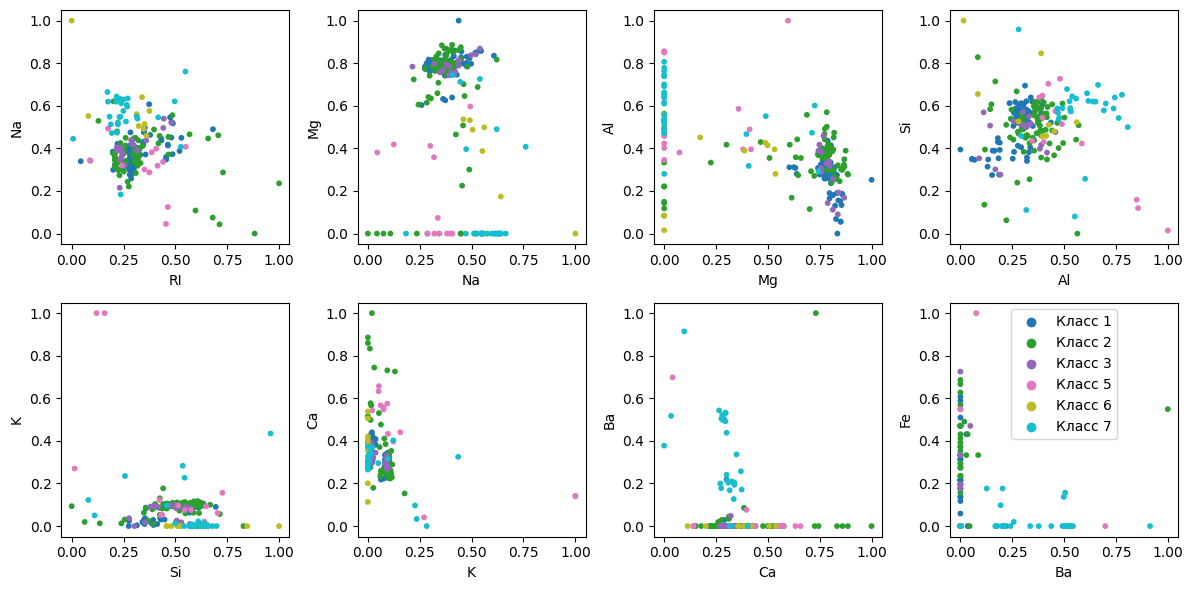

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("glass.csv")

var_names = list(df.columns)
labels = df.to_numpy(int)[:, -1]   
data = df.to_numpy(float)[:, :-1]  

data = preprocessing.minmax_scale(data)

unique_classes = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
point_colors = [class_to_color[l] for l in labels]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i in range(data.shape[1] - 1):
    axs[i].scatter(data[:, i], data[:, i+1], c=point_colors, s=10)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[i+1])

for cls, col in class_to_color.items():
    plt.scatter([], [], c=[col], label=f"Класс {cls}")
plt.legend()

plt.tight_layout()
plt.show()


[0.45429569 0.17990097]
[5.1049308  3.21245688]


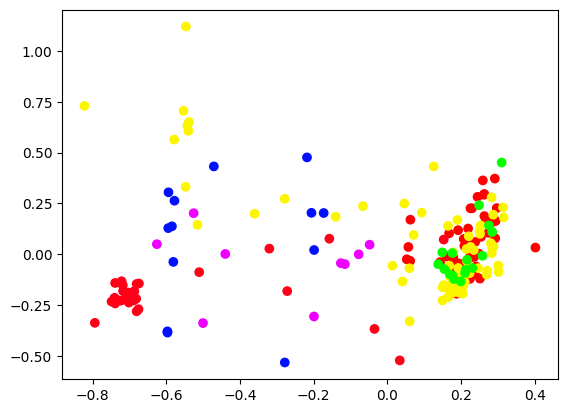

Минимальное число компонент для >=85% дисперсии: 4


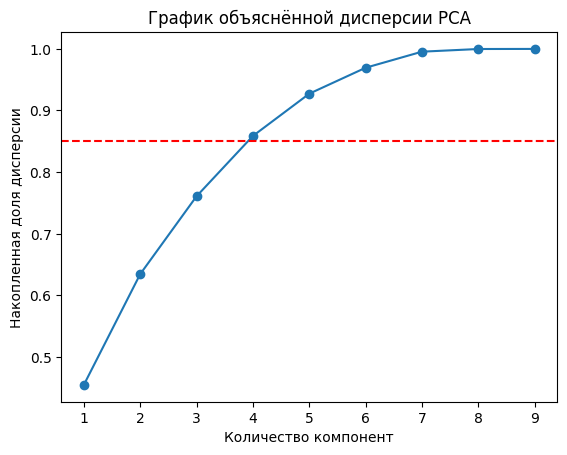


--- Шаг 6: Восстановление данных ---
Исходные (нормированные) данные (первые 5 строк и первые 4 признака):
[[0.4328 0.4376 1.     0.2523]
 [0.2836 0.4752 0.8018 0.3333]
 [0.2208 0.4211 0.7906 0.3894]
 [0.2858 0.3729 0.8218 0.3115]
 [0.2752 0.382  0.8062 0.296 ]]

Восстановленные данные (первые 5 строк и первые 4 признака):
[[0.3198 0.3518 0.9596 0.2483]
 [0.2354 0.4086 0.8024 0.3587]
 [0.2103 0.4206 0.7922 0.3805]
 [0.2588 0.3958 0.8249 0.3344]
 [0.2466 0.4021 0.8158 0.3463]]

Общая среднеквадратичная ошибка (MSE) восстановления: 0.010895
Общая объясненная дисперсия (для справки): 0.6342
MSE по каждому признаку (потери информации):
           RI       Na        Mg        Al        Si         K        Ca  \
MSE  0.004842  0.01162  0.001427  0.010708  0.016468  0.010171  0.002823   

           Ba        Fe  
MSE  0.014828  0.025169  

--- Шаг 7: Исследование svd_solver ---
Сравнение общей объясненной дисперсии при n_components=2:
svd_solver='full' (традиционный): Объясненная дисперсия:

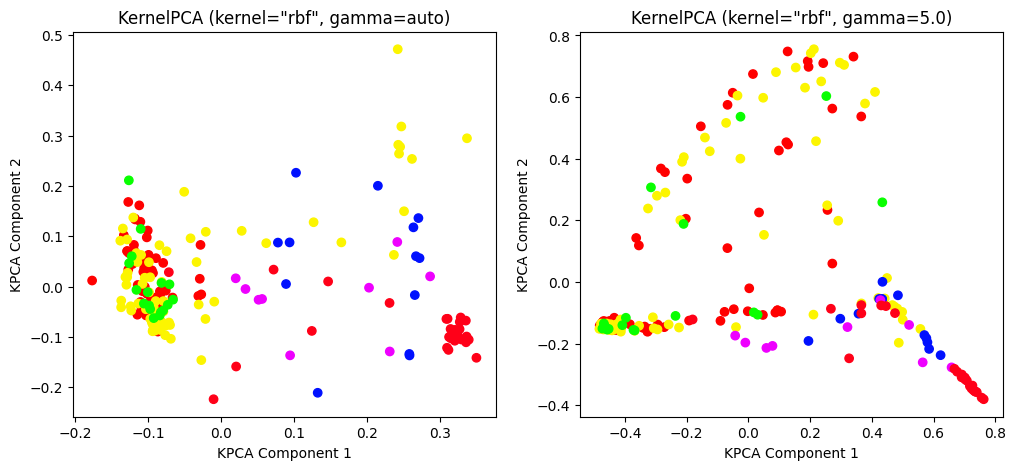


--- 2. Сравнение PCA и Linear KernelPCA ---
Коэффициент корреляции между PCA Component 1 и KPCA Component 1: -1.0000
Коэффициент корреляции между PCA Component 2 и KPCA Component 2: 1.0000
Вывод: При kernel='linear' KernelPCA дает результаты, почти идентичные PCA (с точностью до знака/вращения).

--- 3. Исследование SparsePCA ---

Векторы компонент (нагрузки) SparsePCA при alpha=0.1:
      SPC1    SPC2
RI -0.0665  0.5047
Na -0.0714 -0.1994
Mg  0.9283  0.0000
Al -0.2026 -0.3645
Si -0.0095 -0.2123
K   0.0000 -0.0950
Ca -0.1758  0.4761
Ba -0.2380 -0.1695
Fe  0.0000  0.5130

Векторы компонент (нагрузки) SparsePCA при alpha=5.0 (сильная разреженность):
    SPC1  SPC2
RI   0.0   0.0
Na   0.0   0.0
Mg   0.0   0.0
Al   0.0   0.0
Si   0.0   0.0
K    0.0   0.0
Ca   0.0   0.0
Ba   0.0   0.0
Fe   0.0   0.0


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

pca2= PCA().fit(data)

explained_variance = np.cumsum(pca2.explained_variance_ratio_)

n_components_85 = np.argmax(explained_variance >= 0.85) + 1
print("Минимальное число компонент для >=85% дисперсии:", n_components_85)

plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная доля дисперсии")
plt.title("График объяснённой дисперсии PCA")
plt.show()

reconstructed_data = pca.inverse_transform(pca_data)


print("\n--- Шаг 6: Восстановление данных ---")
print("Исходные (нормированные) данные (первые 5 строк и первые 4 признака):")
print(data[:5, :4].round(4))
print("\nВосстановленные данные (первые 5 строк и первые 4 признака):")
print(reconstructed_data[:5, :4].round(4))


total_mse = mean_squared_error(data, reconstructed_data)
mse_per_feature = np.mean((data - reconstructed_data)**2, axis=0)

print(f"\nОбщая среднеквадратичная ошибка (MSE) восстановления: {total_mse:.6f}")
print(f"Общая объясненная дисперсия (для справки): {np.sum(pca.explained_variance_ratio_):.4f}")
print("MSE по каждому признаку (потери информации):")

var_names = list(df.columns)[:-1]
print(pd.DataFrame(mse_per_feature, index=var_names, columns=['MSE']).T)



print("\n--- Шаг 7: Исследование svd_solver ---")
print("Сравнение общей объясненной дисперсии при n_components=2:")

pca_full = PCA(n_components=2, svd_solver='full')
pca_full.fit(data)
print(f"svd_solver='full' (традиционный): Объясненная дисперсия: {np.sum(pca_full.explained_variance_ratio_):.6f}")


pca_arpack = PCA(n_components=2, svd_solver='arpack')
pca_arpack.fit(data)
print(f"svd_solver='arpack' (итерационный): Объясненная дисперсия: {np.sum(pca_arpack.explained_variance_ratio_):.6f}")


pca_randomized = PCA(n_components=2, svd_solver='randomized', random_state=42)
pca_randomized.fit(data)
print(f"svd_solver='randomized' (приближенный): Объясненная дисперсия: {np.sum(pca_randomized.explained_variance_ratio_):.6f}")


from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error

print("\n--- 1. Исследование KernelPCA ---")


kpca_linear = KernelPCA(n_components=2, kernel="linear")
kpca_data_linear = kpca_linear.fit_transform(data)

kpca_poly = KernelPCA(n_components=2, kernel="poly", gamma=1, degree=2, coef0=1)
kpca_data_poly = kpca_poly.fit_transform(data)


kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=None)

kpca_data_rbf = kpca_rbf.fit_transform(data)


kpca_rbf_high_gamma = KernelPCA(n_components=2, kernel="rbf", gamma=5.0)
kpca_data_rbf_high_gamma = kpca_rbf_high_gamma.fit_transform(data)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(kpca_data_rbf[:, 0], kpca_data_rbf[:, 1], c=labels, cmap='hsv')
plt.title(f'KernelPCA (kernel="rbf", gamma=auto)')
plt.xlabel("KPCA Component 1")
plt.ylabel("KPCA Component 2")

plt.subplot(1, 2, 2)
plt.scatter(kpca_data_rbf_high_gamma[:, 0], kpca_data_rbf_high_gamma[:, 1], c=labels, cmap='hsv')
plt.title(f'KernelPCA (kernel="rbf", gamma=5.0)')
plt.xlabel("KPCA Component 1")
plt.ylabel("KPCA Component 2")
plt.show()


pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

kpca_linear = KernelPCA(n_components=2, kernel="linear")
kpca_data_linear = kpca_linear.fit_transform(data)


corr_comp1 = np.corrcoef(pca_data[:, 0], kpca_data_linear[:, 0])[0, 1]
corr_comp2 = np.corrcoef(pca_data[:, 1], kpca_data_linear[:, 1])[0, 1]

print("\n--- 2. Сравнение PCA и Linear KernelPCA ---")
print(f"Коэффициент корреляции между PCA Component 1 и KPCA Component 1: {corr_comp1:.4f}")
print(f"Коэффициент корреляции между PCA Component 2 и KPCA Component 2: {corr_comp2:.4f}")
print("Вывод: При kernel='linear' KernelPCA дает результаты, почти идентичные PCA (с точностью до знака/вращения).")

from sklearn.decomposition import SparsePCA

print("\n--- 3. Исследование SparsePCA ---")

spca_low_alpha = SparsePCA(n_components=2, alpha=0.1, random_state=42)
spca_low_alpha.fit(data)

spca_high_alpha = SparsePCA(n_components=2, alpha=5.0, random_state=42)
spca_high_alpha.fit(data)



print("\nВекторы компонент (нагрузки) SparsePCA при alpha=0.1:")
spca_low_df = pd.DataFrame(spca_low_alpha.components_.T, index=var_names, columns=['SPC1', 'SPC2'])
print(spca_low_df.round(4))

print("\nВекторы компонент (нагрузки) SparsePCA при alpha=5.0 (сильная разреженность):")
spca_high_df = pd.DataFrame(spca_high_alpha.components_.T, index=var_names, columns=['SPC1', 'SPC2'])
print(spca_high_df.round(4))


--- 1. Факторный анализ (FactorAnalysis) ---

Матрица нагрузок Факторного Анализа (2 фактора):
    Factor 1  Factor 2
RI    0.0823   -0.0783
Na   -0.0070    0.0629
Mg   -0.2517   -0.1973
Al    0.0081    0.1109
Si   -0.0091    0.0482
K    -0.0232    0.0285
Ca    0.1189   -0.0566
Ba    0.0253    0.0933
Fe    0.0088   -0.0369

--- 2. Сравнение с PCA ---

Матрица нагрузок PCA (Главные компоненты):
      PC 1    PC 2
RI -0.0342  0.5133
Na -0.1104 -0.1987
Mg  0.9090 -0.1171
Al -0.2490 -0.3474
Si -0.0508 -0.2164
K   0.0027 -0.1293
Ca -0.1409  0.5023
Ba -0.2668 -0.1643
Fe  0.0680  0.4688

Матрица нагрузок FA (Факторы):
    Factor 1  Factor 2
RI    0.0823   -0.0783
Na   -0.0070    0.0629
Mg   -0.2517   -0.1973
Al    0.0081    0.1109
Si   -0.0091    0.0482
K    -0.0232    0.0285
Ca    0.1189   -0.0566
Ba    0.0253    0.0933
Fe    0.0088   -0.0369

PCA: Объясненная дисперсия первыми 2 компонентами: 0.6342
FA: Общая дисперсия, объясненная 2 общими факторами (Commonality): 8.8954
   (Примечание: э

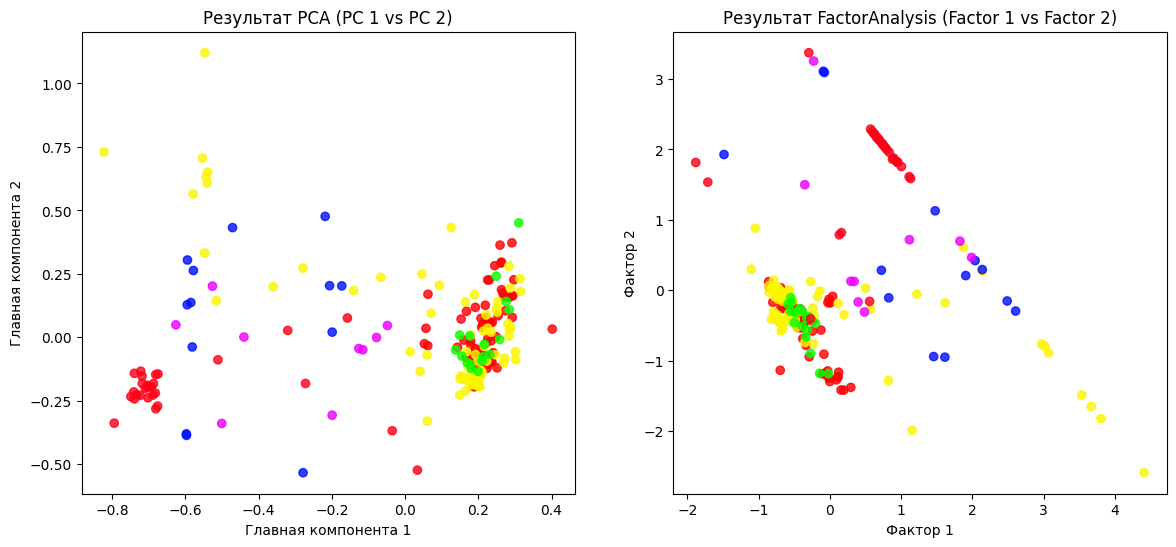

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.decomposition import PCA
df = pd.read_csv('glass.csv')
var_names = list(df.columns)[:-1] #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки
data = preprocessing.minmax_scale(data)

print("\n--- 1. Факторный анализ (FactorAnalysis) ---")

n_components_fa = 2
fa = FactorAnalysis(n_components=n_components_fa, random_state=42)
fa_data = fa.fit_transform(data)


loadings_df = pd.DataFrame(fa.components_.T,
                           index=var_names,
                           columns=[f'Factor {i+1}' for i in range(n_components_fa)])

print("\nМатрица нагрузок Факторного Анализа (2 фактора):")
print(loadings_df.round(4))



pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

print("\n--- 2. Сравнение с PCA ---")


pca_loadings_df = pd.DataFrame(pca.components_.T, index=var_names, columns=['PC 1', 'PC 2'])

print("\nМатрица нагрузок PCA (Главные компоненты):")
print(pca_loadings_df.round(4))


print("\nМатрица нагрузок FA (Факторы):")
print(loadings_df.round(4))


print(f"\nPCA: Объясненная дисперсия первыми 2 компонентами: {np.sum(pca.explained_variance_ratio_):.4f}")

commonality = 1 - fa.noise_variance_
print(f"FA: Общая дисперсия, объясненная 2 общими факторами (Commonality): {np.sum(commonality):.4f}")
print("   (Примечание: это не прямое сравнение с explained_variance_ratio_ PCA)")



plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='hsv', alpha=0.8)
plt.title('Результат PCA (PC 1 vs PC 2)')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")

plt.subplot(1, 2, 2)
plt.scatter(fa_data[:, 0], fa_data[:, 1], c=labels, cmap='hsv', alpha=0.8)
plt.title('Результат FactorAnalysis (Factor 1 vs Factor 2)')
plt.xlabel("Фактор 1")
plt.ylabel("Фактор 2")
plt.show()